In [1]:
pip install pandas snscrape nltk spacy transformers wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import nltk, spacy
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
import re, string

df = pd.read_csv("pilkada2017.csv")
def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+", "", text)  # hapus mention
    text = re.sub(r"#", "", text)  # hapus tanda #
    text = text.lower()  # lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # hapus tanda baca
    return text.strip()

df["clean_text"] = df["Text Tweet"].apply(clean_text)
df.head()

,Id,Sentiment,Pasangan Calon,Text Tweet,clean_text
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...,banyak akun kloning seolah2 pendukung agussilv...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...,agussilvy bicara apa kasihan yaalap itu air ma...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...,kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,maaf ya pendukung agussilvyhayo dukung aniessa...


In [6]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_percentages = df['Sentiment'].value_counts(normalize=True) * 100

print("Number of comments by sentiment:")
print(sentiment_counts)
print("\nPercentage of comments by sentiment:")
print(sentiment_percentages)

Number of comments by sentiment:
Sentiment
negative    450
positive    450
Name: count, dtype: int64

Percentage of comments by sentiment:
Sentiment
negative    50.0
positive    50.0
Name: proportion, dtype: float64


In [7]:
clean_text_data = df['clean_text']
display(clean_text_data.head())

,clean_text
0,banyak akun kloning seolah2 pendukung agussilv...
1,agussilvy bicara apa kasihan yaalap itu air ma...
2,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,kasian oh kasian dengan peluru 1milyar untuk t...
4,maaf ya pendukung agussilvyhayo dukung aniessa...


In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

tokenized_data = clean_text_data.apply(word_tokenize)
display(tokenized_data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,clean_text
0,"[banyak, akun, kloning, seolah2, pendukung, ag..."
1,"[agussilvy, bicara, apa, kasihan, yaalap, itu,..."
2,"[kalau, aku, sih, gak, nunggu, hasil, akhir, q..."
3,"[kasian, oh, kasian, dengan, peluru, 1milyar, ..."
4,"[maaf, ya, pendukung, agussilvyhayo, dukung, a..."


In [10]:
# Load stop words from the provided file
with open('/content/stopword.txt', 'r') as f:
    stopwords = f.read().splitlines()

# Remove stop words from the tokenized data
filtered_data = tokenized_data.apply(lambda tokens: [word for word in tokens if word not in stopwords])

display(filtered_data.head())

,clean_text
0,"[akun, kloning, seolah2, pendukung, agussilvy,..."
1,"[agussilvy, bicara, kasihan, yaalap, air, mata..."
2,"[sih, nunggu, hasil, qc, tp, nunggu, motif, cu..."
3,"[kasian, oh, kasian, peluru, 1milyar, rw, agus..."
4,"[maaf, pendukung, agussilvyhayo, dukung, anies..."


In [11]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed_data = filtered_data.apply(lambda tokens: [stemmer.stem(word) for word in tokens])
display(stemmed_data.head())

,clean_text
0,"[akun, kloning, seolah2, dukung, agussilvy, se..."
1,"[agussilvy, bicara, kasihan, yaalap, air, mata..."
2,"[sih, nunggu, hasil, qc, tp, nunggu, motif, cu..."
3,"[kasi, oh, kasi, peluru, 1milyar, rw, agussilv..."
4,"[maaf, dukung, agussilvyhayo, dukung, aniessan..."


In [13]:
from sklearn.model_selection import train_test_split

X = stemmed_data
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)

Training data shape (X_train): (720,)
Testing data shape (X_test): (180,)
Training labels shape (y_train): (720,)
Testing labels shape (y_test): (180,)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokens back into strings
X_train_str = X_train.apply(lambda tokens: ' '.join(tokens))
X_test_str = X_test.apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_str)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test_str)

print("TF-IDF Training data shape:", X_train_tfidf.shape)
print("TF-IDF Testing data shape:", X_test_tfidf.shape)

TF-IDF Training data shape: (720, 2369)
TF-IDF Testing data shape: (180, 2369)


In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

print("Naive Bayes model trained successfully.")

Naive Bayes model trained successfully.


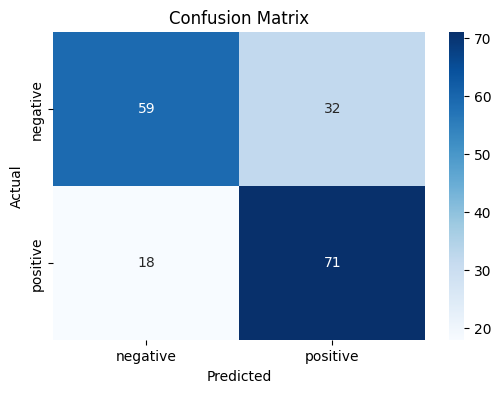

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

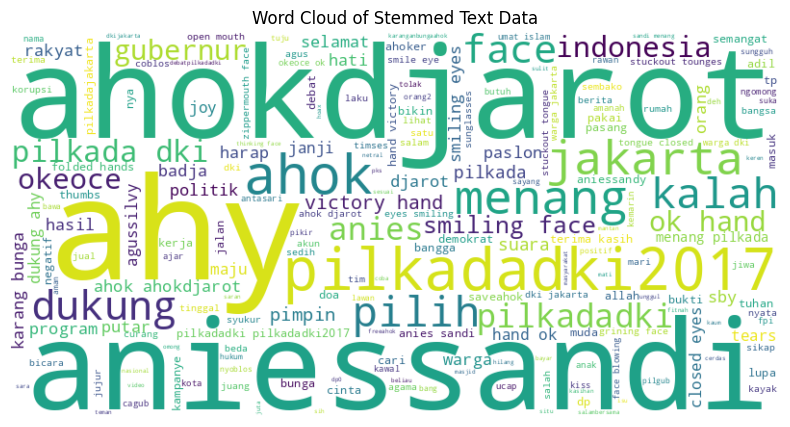

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all stemmed text data into a single string
all_stemmed_text = ' '.join([' '.join(tokens) for tokens in stemmed_data])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_stemmed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Text Data')
plt.show()

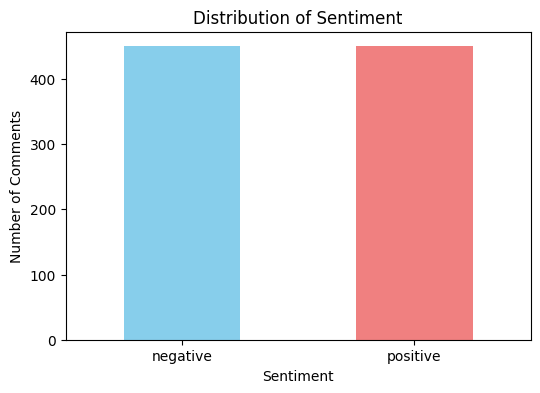

In [22]:
import matplotlib.pyplot as plt

# Calculate sentiment counts (already done in a previous cell, using the result)
# sentiment_counts = df['Sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7222
Precision: 0.6893
Recall: 0.7978
F1 Score: 0.7396

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.65      0.70        91
    positive       0.69      0.80      0.74        89

    accuracy                           0.72       180
   macro avg       0.73      0.72      0.72       180
weighted avg       0.73      0.72      0.72       180

